# Notebook Description

This notebook represents my final project for my class, Computer Science 17600: Data Engineering in Python. This notebook utiizes fictional health data from Kaggle and preforms data cleaning, data transformation, data visualization, and more to gain insights into the data. For comprehension, follow along with the instructor-directed prompts as well as my comments within each cell block! 

# CS176 Project Spring 2023

The purpose of this project is to gain experience working with a larger and more complicated data set than is typical in mast homework or labs. The problems here will take you from cleaning data through multi-index problems. We recommend starting early, to get the already practiced portions out of the way.

## Data sets
The data used in this project comes from https://www.kaggle.com/competitions/hhp/. The documentation for data files is provided at https://www.kaggle.com/competitions/hhp/data.

A code below loads the slightly modified and trimmed csv datasets that you will use in this project. 

In [70]:
#Final Submission

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df_claim = pd.read_csv('Claims.csv')
df_drug = pd.read_csv('DrugCount.csv')
df_lab = pd.read_csv('LabCount.csv')
df_member = pd.read_csv('Members.csv')
df_Y2 = pd.read_csv('DaysInHospital_Y2.csv')
df_Y3 = pd.read_csv('DaysInHospital_Y3.csv')
df_condg = pd.read_csv('LookupPrimaryConditionGroup.csv')
df_procg = pd.read_csv('LookupProcedureGroup.csv')

In [127]:
df_claim.head()

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,29896446,5405540.0,588544.0,93075.0,Y1,General Practice,Office,36,NaN,0- 1 month,ARTHSPIN,0,EM,0
1,78214870,4107701.0,164823.0,36452.0,Y2,Laboratory,Independent Lab,36,NaN,2- 3 months,CANCRB,1-2,PL,0
2,16561727,4573331.0,111078.0,27467.0,Y1,Surgery,Office,17,NaN,7- 8 months,NEUMENT,1-2,RAD,0
3,95183713,3020962.0,502551.0,38724.0,Y2,Internal,Office,20,NaN,0- 1 month,MISCHRT,1-2,MED,0
4,29400218,7542342.0,472534.0,75876.0,Y2,General Practice,Office,23,NaN,0- 1 month,MISCHRT,0,EM,0


In [74]:
df_lab.head()

,MemberID,Year,DSFS,LabCount
0,90572264,Y3,7- 8 months,2
1,59967736,Y2,0- 1 month,7
2,39463156,Y1,2- 3 months,2
3,12302788,Y1,2- 3 months,2
4,2935987,Y3,9-10 months,7


In [75]:
df_member.head()

,MemberID,AgeAtFirstClaim,Sex
0,14723353,70-79,M
1,75706636,70-79,M
2,17320609,70-79,M
3,69690888,40-49,M
4,33004608,0-9,M


In [76]:
df_member['AgeAtFirstClaim'].unique()

array(['70-79', '40-49', '0-9', '30-39', '50-59', '60-69', '10-19', '80+',
       '20-29', nan], dtype=object)

In [77]:
df_Y2.head()

,MemberID,ClaimsTruncated,DaysInHospital
0,10015062,0,0
1,17971437,0,0
2,38388438,0,0
3,4187422,0,0
4,39285418,0,0


In [78]:
df_Y3.head()

,MemberID,ClaimsTruncated,DaysInHospital
0,90963501,0,0
1,25044772,0,1
2,48035085,0,0
3,97333570,0,0
4,14427616,0,8


In [79]:
df_condg.head()

,PrimaryConditionGroup,Description
0,AMI,Acute myocardial infarction
1,APPCHOL,Appendicitis
2,ARTHSPIN,Arthropathies
3,CANCRA,Cancer A
4,CANCRB,Cancer B


In [80]:
df_procg.head()

,ProcedureGroup,Description
0,ANES,Anesthesia
1,EM,Evaluation and Management
2,MED,Medicine
3,PL,Pathology and Laboratory
4,RAD,Radiology


## Problem 1: Familiarization with the data

### Q1.1
Find the number of members stayed in hospital in Year 2 and Year 3 for a total of more than 5 days (> 5). Do not include members who had missing DaysInHospital field in any of the years.

In [3]:
def q1_1():
    ###
    ### YOUR CODE HERE
    ###
    
    # merge the Year 2 and Year 3 dataframes on MemberID
    df = pd.merge(df_Y2, df_Y3, on='MemberID', suffixes=('_y2', '_y3'))

    # filter the merged dataframe for members who stayed more than 5 days in Year 2 or Year 3
    df_filtered = df[(~df.DaysInHospital_y2.isna() | ~df.DaysInHospital_y3.isna()) & (df.DaysInHospital_y2.fillna(0) + df.DaysInHospital_y3.fillna(0) > 5)]

    # count the number of unique members in the filtered dataframe
    answers = df_filtered.MemberID.nunique()
    return answers
    
q1_1()

89

In [82]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Q1.2
Which memberID had the largest number of claims of 'Surgery' speciality.

In [4]:
def q1_2():
    ###
    ### YOUR CODE HERE
    ###
    
    #filter DF to get just the surgery claims
    df_surgery = df_claim[df_claim["Specialty"] == "Surgery"]
 
    #count the number of number of claims, after grouping by id
    surgery_count = df_surgery.groupby('MemberID').size()
    
    #max of surgery count, but don't return the number but the index
    answer = surgery_count.idxmax()
    return answer
    
q1_2()

16773510

In [84]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Q1.3
Return the list of **Male** memberID's that had the largest number of lab visits (Maximum number of entries in Labs dataframe)

In [5]:
def q1_3():
    ###
    ### YOUR CODE HERE
    ###
    
    #get only males 
    male_df = df_member[df_member["Sex"] == "M"]
    
    #merge df together
    answer_df = pd.merge(male_df, df_lab, how="inner", on="MemberID")

    # count the number of lab visits for each member ID
    visit_counts = answer_df['MemberID'].value_counts()

    #Get maximum value of visit counts
    max_vis_ID = visit_counts.max()
    
    #get the positions of the entities that contain the max value of visit counts
    max_indexes = np.where(visit_counts.values == max_vis_ID)[0]
    
    #get the indexes for the answer above
    max_values = visit_counts.index[max_indexes]

    #convert that to a list
    answer = max_values.to_list()
    return answer
    
q1_3()

[21265699, 75361913]

In [86]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Q1.4
Return the actual names of most common type of PrimaryConditionGroup and ProcedureGroup that occurs together in claims table.

In [6]:
def q1_4():
    ###
    ### YOUR CODE HERE
    ###
    
    # group the claims dataframe by PrimaryConditionGroup and ProcedureGroup, and count the number of occurrences
    grouped = df_claim.groupby(['PrimaryConditionGroup', 'ProcedureGroup']).size().reset_index(name='count')

    # find the pair with the maximum count
    max_pair = grouped.loc[grouped['count'].idxmax()]

    #get the abbreviates names of the PrimaryConditionGroup and ProcedureGroup
    pcg_abbrv = max_pair['PrimaryConditionGroup']
    pg_abbrv = max_pair['ProcedureGroup']

    #check abbreviations from the above answer to the 2 descriptive data frames up above
    pcg_fullname = df_condg.loc[df_condg['PrimaryConditionGroup'] == pcg_abbrv]
    pg_fullname = df_procg.loc[df_procg['ProcedureGroup'] == pg_abbrv]
    
    pcg_answer = pcg_fullname["Description"].values[0]
    pg_answer = pg_fullname["Description"].values[0]

    return pcg_answer, pg_answer

q1_4()

('Miscellaneous 2', 'Pathology and Laboratory')

In [88]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Problem 2: Cleaning data

### Q2.1
Complete the function that returns the number and percentage of empty values in each column. It should exclude columns that don't have any missing value.

In [7]:
def count_nulls(df):
    ###
    ### YOUR CODE HERE
    ###
    
    
    #first way
    num_rows = len(df)
    missing_counts = {}
    
    for col in df.columns:
        num_missing = df[col].isna().sum()
        if num_missing > 0:
            missing_counts[col] = (num_missing, num_missing / num_rows * 100)
    return missing_counts
    

    
count_nulls(df_claim)

{'ProviderID': (693, 0.5952789994502474),
 'Vendor': (1032, 0.8864760857614072),
 'PCP': (278, 0.2387987905442551),
 'Specialty': (341, 0.2929150632215503),
 'PlaceSvc': (306, 0.2628504672897196),
 'LengthOfStay': (113229, 97.26240379329302),
 'DSFS': (2060, 1.769516217702034),
 'PrimaryConditionGroup': (472, 0.40544255085211656),
 'ProcedureGroup': (178, 0.15289994502473886)}

In [8]:
display(count_nulls(df_claim))
display(count_nulls(df_member))
display(count_nulls(df_drug))
display(count_nulls(df_lab))
display(count_nulls(df_Y2))
display(count_nulls(df_Y3))

{'ProviderID': (693, 0.5952789994502474),
 'Vendor': (1032, 0.8864760857614072),
 'PCP': (278, 0.2387987905442551),
 'Specialty': (341, 0.2929150632215503),
 'PlaceSvc': (306, 0.2628504672897196),
 'LengthOfStay': (113229, 97.26240379329302),
 'DSFS': (2060, 1.769516217702034),
 'PrimaryConditionGroup': (472, 0.40544255085211656),
 'ProcedureGroup': (178, 0.15289994502473886)}

{'AgeAtFirstClaim': (263, 5.26), 'Sex': (755, 15.1)}

{}

{}

{}

{}

### Q2.2
Drop the columns in any of the dataframes that have more than 90% values missing.

In [9]:
###
### YOUR CODE HERE
###

#Original = writing all of themout
df_claim = df_claim.dropna(thresh=len(df_claim)*0.1, axis=1)
df_member = df_member.dropna(thresh=len(df_member)*0.1, axis=1)
df_drug = df_drug.dropna(thresh=len(df_drug)*0.1, axis=1)
df_lab = df_lab.dropna(thresh=len(df_lab)*0.1, axis=1)
df_Y2 = df_Y2.dropna(thresh=len(df_Y2)*0.1, axis=1)
df_Y3 = df_Y3.dropna(thresh=len(df_Y3)*0.1, axis=1)


#New = using a function and doing it that way
#def dropped(df):

    #second way, axis=1 to drop columns 
    #df = df.dropna(thresh=len(df)*0.1, axis=1)

#dropped(df_claim)
#dropped(df_member)
#dropped(df_drug)
#dropped(df_lab)
#dropped(df_Y2)
#dropped(df_Y3)

### Q2.3
Replace all the missing values in the columns Specialty, PlaceSvc	and ProcedureGroup of the new dataframe with the most common value.

In [10]:
###
### YOUR CODE HERE
###

#Specialty
max_specialty = df_claim["Specialty"].value_counts().idxmax()

#PlaceSbc
max_place = df_claim["PlaceSvc"].value_counts().idxmax()

#ProcedureGroup
max_PG = df_claim["ProcedureGroup"].value_counts().idxmax()

df_claim = df_claim.fillna({"Specialty":max_specialty, "PlaceSvc":max_place, "ProcedureGroup":max_PG})

df_claim

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,29896446,5405540.0,588544.0,93075.0,Y1,General Practice,Office,36,0- 1 month,ARTHSPIN,0,EM,0
1,78214870,4107701.0,164823.0,36452.0,Y2,Laboratory,Independent Lab,36,2- 3 months,CANCRB,1-2,PL,0
2,16561727,4573331.0,111078.0,27467.0,Y1,Surgery,Office,17,7- 8 months,NEUMENT,1-2,RAD,0
3,95183713,3020962.0,502551.0,38724.0,Y2,Internal,Office,20,0- 1 month,MISCHRT,1-2,MED,0
4,29400218,7542342.0,472534.0,75876.0,Y2,General Practice,Office,23,0- 1 month,MISCHRT,0,EM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116411,32717413,321261.0,152610.0,25354.0,Y2,Laboratory,Independent Lab,10,2- 3 months,METAB3,1-2,SCS,0
116412,2756750,7053364.0,240043.0,72351.0,Y1,Laboratory,Independent Lab,30,0- 1 month,MSC2a3,0,SCS,0
116413,69119538,4107701.0,164823.0,94201.0,Y1,Laboratory,Independent Lab,29,0- 1 month,MSC2a3,0,PL,0
116414,28050826,2352545.0,122401.0,21579.0,Y2,Internal,Office,22,6- 7 months,METAB3,1-2,EM,0


### Q2.4
Notice that ProviderID, Vender and PCP in df_claims are float strings (Ex. 12231.0), which isn't accurate representation. These columns are ID's for respective entities, and ideally should be int (Ex. 12231). Convert these columns to int, handling the missing values separately.

In [11]:
###
### YOUR CODE HERE
###

#checking to see if there are any null NaN values in these columns = they all have a sum of 0=no missing values
#df_claim["ProviderID"].isnull().sum()

#change to type int but just incase fill missing values with 0
df_claim['ProviderID'] = df_claim['ProviderID'].fillna(0).astype(int)
df_claim['Vendor'] = df_claim['Vendor'].fillna(0).astype(int)
df_claim['PCP'] = df_claim['PCP'].fillna(0).astype(int)

df_claim

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,29896446,5405540,588544,93075,Y1,General Practice,Office,36,0- 1 month,ARTHSPIN,0,EM,0
1,78214870,4107701,164823,36452,Y2,Laboratory,Independent Lab,36,2- 3 months,CANCRB,1-2,PL,0
2,16561727,4573331,111078,27467,Y1,Surgery,Office,17,7- 8 months,NEUMENT,1-2,RAD,0
3,95183713,3020962,502551,38724,Y2,Internal,Office,20,0- 1 month,MISCHRT,1-2,MED,0
4,29400218,7542342,472534,75876,Y2,General Practice,Office,23,0- 1 month,MISCHRT,0,EM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116411,32717413,321261,152610,25354,Y2,Laboratory,Independent Lab,10,2- 3 months,METAB3,1-2,SCS,0
116412,2756750,7053364,240043,72351,Y1,Laboratory,Independent Lab,30,0- 1 month,MSC2a3,0,SCS,0
116413,69119538,4107701,164823,94201,Y1,Laboratory,Independent Lab,29,0- 1 month,MSC2a3,0,PL,0
116414,28050826,2352545,122401,21579,Y2,Internal,Office,22,6- 7 months,METAB3,1-2,EM,0


### Q2.5
The DrugCount and LabCount columns in df_drug and df_lab are type object, but we want them as integers for further analysis. These columns have upper bound values written 'num+' (Ex. 7+). You can ignore that '+' sign and convert these columns to integers.

In [12]:
###
### YOUR CODE HERE
###

#first make as string
df_drug['DrugCount'] = df_drug['DrugCount'].astype(str)
df_lab['LabCount'] = df_lab['LabCount'].astype(str)

#once made as string we can now strip parts of the string, in this case, strip the "+"
df_drug['DrugCount'] = df_drug['DrugCount'].str.rstrip('+')
df_lab['LabCount'] = df_lab['LabCount'].str.rstrip('+')


# convert DrugCount and LabCount columns to integers now that the "+" is gone
df_drug['DrugCount'] = df_drug['DrugCount'].astype(int)
df_lab['LabCount'] = df_lab['LabCount'].astype(int)

display(df_drug)
display(df_lab)

,MemberID,Year,DSFS,DrugCount
0,68003887,Y1,2- 3 months,2
1,70992987,Y2,9-10 months,5
2,41264225,Y1,7- 8 months,3
3,11023811,Y1,2- 3 months,2
4,98098631,Y2,8- 9 months,3
...,...,...,...,...
36359,85993938,Y1,4- 5 months,4
36360,48052903,Y1,6- 7 months,1
36361,86366586,Y3,7- 8 months,4
36362,82277097,Y3,0- 1 month,1


,MemberID,Year,DSFS,LabCount
0,90572264,Y3,7- 8 months,2
1,59967736,Y2,0- 1 month,7
2,39463156,Y1,2- 3 months,2
3,12302788,Y1,2- 3 months,2
4,2935987,Y3,9-10 months,7
...,...,...,...,...
16046,19097391,Y1,0- 1 month,2
16047,84892391,Y3,0- 1 month,1
16048,19918372,Y3,0- 1 month,10
16049,77385426,Y3,1- 2 months,8


In [13]:
df_claim

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,29896446,5405540,588544,93075,Y1,General Practice,Office,36,0- 1 month,ARTHSPIN,0,EM,0
1,78214870,4107701,164823,36452,Y2,Laboratory,Independent Lab,36,2- 3 months,CANCRB,1-2,PL,0
2,16561727,4573331,111078,27467,Y1,Surgery,Office,17,7- 8 months,NEUMENT,1-2,RAD,0
3,95183713,3020962,502551,38724,Y2,Internal,Office,20,0- 1 month,MISCHRT,1-2,MED,0
4,29400218,7542342,472534,75876,Y2,General Practice,Office,23,0- 1 month,MISCHRT,0,EM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116411,32717413,321261,152610,25354,Y2,Laboratory,Independent Lab,10,2- 3 months,METAB3,1-2,SCS,0
116412,2756750,7053364,240043,72351,Y1,Laboratory,Independent Lab,30,0- 1 month,MSC2a3,0,SCS,0
116413,69119538,4107701,164823,94201,Y1,Laboratory,Independent Lab,29,0- 1 month,MSC2a3,0,PL,0
116414,28050826,2352545,122401,21579,Y2,Internal,Office,22,6- 7 months,METAB3,1-2,EM,0


### Q2.6 (Open Ended)
Clean, Convert types, and fill missing columns in all dataframes using any method of your choice you deem fit with proper justification

**Note:** You need to use atleast 3 different strategies for this question. And you should add detailed comments to explain each strategy

In [14]:
## Use Mardown blocks and comments to justify your cleaning and missing value imputation methods
## Example DSFS month strings can be converted to medain values for numerical analysis or just imputing values
###
### YOUR CODE HERE
###
def answer(df):
    #Clean
    #drop duplicates
    df = df.drop_duplicates()
    #drop missing values of more than 50% missing values
    df = df.dropna(thresh=len(df)*0.5, axis=1)

    #Convert
    #convert all things into a string, doesn't make sense bc some things need to be integers
    #conversion is seen below

    #Missing
    #first method of filling = fill all missing types with Nan, make sure to fill numbers with 0s and strings with 0s
    for col in df.columns:
        # Check if the column has integer or float values
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            # Fill NaNs with 0
            df[col].fillna(value=0, inplace=True)
        # Check if the column has string values
        else:
            # Fill NaNs with NaN
            df[col].fillna(value=pd.NaT, inplace=True)
    
    #second method of filling = use the bfill method to back fill the missing value
    df = df.fillna(method="bfill")

    #third method of filing = use the ffill method to front fill the missing value
    df = df.fillna(method="ffill")
    
#write a function so that way we can do this on all datafraes easily 
answer(df_claim)
answer(df_drug)
answer(df_lab)
answer(df_member)
answer(df_Y2)
answer(df_Y3)
answer(df_condg)
answer(df_procg)

In [15]:
df_claim

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,29896446,5405540,588544,93075,Y1,General Practice,Office,36,0- 1 month,ARTHSPIN,0,EM,0
1,78214870,4107701,164823,36452,Y2,Laboratory,Independent Lab,36,2- 3 months,CANCRB,1-2,PL,0
2,16561727,4573331,111078,27467,Y1,Surgery,Office,17,7- 8 months,NEUMENT,1-2,RAD,0
3,95183713,3020962,502551,38724,Y2,Internal,Office,20,0- 1 month,MISCHRT,1-2,MED,0
4,29400218,7542342,472534,75876,Y2,General Practice,Office,23,0- 1 month,MISCHRT,0,EM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116411,32717413,321261,152610,25354,Y2,Laboratory,Independent Lab,10,2- 3 months,METAB3,1-2,SCS,0
116412,2756750,7053364,240043,72351,Y1,Laboratory,Independent Lab,30,0- 1 month,MSC2a3,0,SCS,0
116413,69119538,4107701,164823,94201,Y1,Laboratory,Independent Lab,29,0- 1 month,MSC2a3,0,PL,0
116414,28050826,2352545,122401,21579,Y2,Internal,Office,22,6- 7 months,METAB3,1-2,EM,0


## Problem 3: Aggregating Data

Now you should have datasets with no missing values and in conforming types

### Q3.1
Create new dataframe df_lab_agg that has one row per each (MemberID, Year). It should have 2 more columns for aggregated total LabCount ('LabCountTotal') and number of (MemberID, Year) entries in original df_lab ('LabVisits') for each (MemberID, Year).

In [16]:
###
### YOUR CODE HERE
###

# Group the original df_lab dataframe by MemberID and Year to get one row per each(memberID,year)
#then use .agg to aggregate LabCount with sum and then count
df_lab_agg = df_lab.groupby(["MemberID", "Year"]).agg({"LabCount": ["sum", "count"]})

# Fix the column names, sum is matched up with labcounttotal and count is with labvisits
df_lab_agg.columns = ["LabCountTotal", "LabVisits"]

df_lab_agg

LabCountTotal  LabVisits
MemberID Year                          
3713     Y2                9          2
34791    Y1                3          1
77647    Y1               12          4
         Y2                9          2
         Y3               10          1
...                      ...        ...
99932868 Y3               28          5
99946229 Y2                6          1
         Y3                2          1
99969451 Y2                3          2
         Y3                3          1

[6787 rows x 2 columns]

In [17]:
df_lab_agg.head()

LabCountTotal  LabVisits
MemberID Year                          
3713     Y2                9          2
34791    Y1                3          1
77647    Y1               12          4
         Y2                9          2
         Y3               10          1

### Q3.2
Similar to Q3.1, create new dataframe df_drug_agg that has one row per each (MemberID, Year). It should have 2 more columns for aggregated total DrugCount ('DrugCountTotal') and number of (MemberID, Year) entries in original df_drug ('DrugVisits') for each (MemberID, Year).

In [18]:
###
### YOUR CODE HERE
###

# Group the original df_drug dataframe by MemberID and Year to get one row per each(memberID,year)
#then use .agg to aggregate drugcount with sum and then count
df_drug_agg = df_drug.groupby(["MemberID", "Year"]).agg({"DrugCount": ["sum", "count"]})

# Fix the column names, sum is matched up with drugcounttotal and count is with drugvisits
df_drug_agg.columns = ["DrugCountTotal", "DrugVisits"]


df_drug_agg

DrugCountTotal  DrugVisits
MemberID Year                            
3713     Y2                17           4
4187     Y1                61          10
34791    Y1                19           9
77647    Y1                15           8
         Y2                 9           5
...                       ...         ...
99946229 Y3                18          10
99946846 Y3                 1           1
99969451 Y1                 3           3
         Y2                 2           2
         Y3                 1           1

[6288 rows x 2 columns]

In [19]:
df_drug_agg.head()

DrugCountTotal  DrugVisits
MemberID Year                            
3713     Y2                17           4
4187     Y1                61          10
34791    Y1                19           9
77647    Y1                15           8
         Y2                 9           5

### Q3.3
Update the PrimaryConditionGroup and ProcedureGroup columns abbrevations with correct descriptions using df_condg and df_procg. Ensure that you don't delete any row from df_claim table.

**Note:** Add a separate 'UNKNOWN' description for abbrevations not present in df_condg and df_procg

In [20]:
claim_orig_row_cnt = len(df_claim)

###
### YOUR CODE HERE
###

#CONDG
#Set index to be abbreviation of the condition group
condg = df_condg.set_index("PrimaryConditionGroup")

#create a dictionary with index as keys which is the abbrevations and values as the descriptions
condg_dict = condg["Description"].to_dict()

# Map the condition group abbrv to their descriptions in the 'PrimaryConditionGroup' column
df_claim["PrimaryConditionGroup"] = df_claim["PrimaryConditionGroup"].map(condg_dict)


#PROCG
#Set index to be abbreviation of the procedure group
procg = df_procg.set_index("ProcedureGroup")

#create a dictionary with index as keys which is the abbrevations and values as the descriptions 
procg_dict = procg["Description"].to_dict()

# Map the condition group abbrv to their descriptions in the 'PrimaryConditionGroup' column
df_claim["ProcedureGroup"] = df_claim["ProcedureGroup"].map(procg_dict)




#fill missing values with unknowns
df_claim["PrimaryConditionGroup"] = df_claim["PrimaryConditionGroup"].fillna("UNKNOWN")
df_claim["ProcedureGroup"] = df_claim["ProcedureGroup"].fillna("UNKNOWN")


df_claim

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,29896446,5405540,588544,93075,Y1,General Practice,Office,36,0- 1 month,Arthropathies,0,Evaluation and Management,0
1,78214870,4107701,164823,36452,Y2,Laboratory,Independent Lab,36,2- 3 months,Cancer B,1-2,Pathology and Laboratory,0
2,16561727,4573331,111078,27467,Y1,Surgery,Office,17,7- 8 months,Other neurological,1-2,Radiology,0
3,95183713,3020962,502551,38724,Y2,Internal,Office,20,0- 1 month,Miscellaneous cardiac,1-2,Medicine,0
4,29400218,7542342,472534,75876,Y2,General Practice,Office,23,0- 1 month,Miscellaneous cardiac,0,Evaluation and Management,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116411,32717413,321261,152610,25354,Y2,Laboratory,Independent Lab,10,2- 3 months,Other metabolic,1-2,Surgery-Cardiovascular System,0
116412,2756750,7053364,240043,72351,Y1,Laboratory,Independent Lab,30,0- 1 month,Miscellaneous 2,0,Surgery-Cardiovascular System,0
116413,69119538,4107701,164823,94201,Y1,Laboratory,Independent Lab,29,0- 1 month,Miscellaneous 2,0,Pathology and Laboratory,0
116414,28050826,2352545,122401,21579,Y2,Internal,Office,22,6- 7 months,Other metabolic,1-2,Evaluation and Management,0


In [21]:
print('Claim Row Count - Original: {}, Updated {}'.format(claim_orig_row_cnt, len(df_claim)))
df_claim.head()

Claim Row Count - Original: 116416, Updated 116416


,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,29896446,5405540,588544,93075,Y1,General Practice,Office,36,0- 1 month,Arthropathies,0,Evaluation and Management,0
1,78214870,4107701,164823,36452,Y2,Laboratory,Independent Lab,36,2- 3 months,Cancer B,1-2,Pathology and Laboratory,0
2,16561727,4573331,111078,27467,Y1,Surgery,Office,17,7- 8 months,Other neurological,1-2,Radiology,0
3,95183713,3020962,502551,38724,Y2,Internal,Office,20,0- 1 month,Miscellaneous cardiac,1-2,Medicine,0
4,29400218,7542342,472534,75876,Y2,General Practice,Office,23,0- 1 month,Miscellaneous cardiac,0,Evaluation and Management,0


### Q3.4
Add information about labs and visits to claims table for each (member, year) by joining df_lab_agg and df_drug_agg with df_claim. 

**Note**: Ensure that you don't delete any row from df_claim table. Mark the total and visits to 0 if no information on that (member, year) is present. Also, make sure that the datatypes of column don't change after the merge.

In [22]:
###
### YOUR CODE HERE
###

#merge df_claim with the df_lab_agg data on Member ID and YEAR
#use left merge to ensure no rows in df_claim data table are deleted
df_claim = df_claim.merge(df_lab_agg,how="left",on=["MemberID", "Year"])

#merge df_claim with the df_drug_agg data on Member ID and YEAR
#use left merge to ensure no rows in df_claim data table are deleted
df_claim = df_claim.merge(df_drug_agg,how="left", on=["MemberID", "Year"])

#fill the NaN's to 0
df_claim = df_claim.iloc[:,:].fillna(0)

#convert these floats to integers
#df_claim.iloc[:,14:18] = df_claim[:,14:18].astype(int)

#I iam going to set the index as memberId  to make it more clear
df_claim = df_claim.set_index(["MemberID"]).sort_index()


df_claim

,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS,LabCountTotal,LabVisits,DrugCountTotal,DrugVisits
MemberID,,,,,,,,,,,,,,,,
3713,4686641,64835,21146,Y2,General Practice,Office,101,1- 2 months,Other renal,0,Evaluation and Management,0,9.0,2.0,17.0,4.0
3713,8558571,656769,68968,Y2,General Practice,Office,37,8- 9 months,Arthropathies,0,Evaluation and Management,0,9.0,2.0,17.0,4.0
3713,7053364,240043,68968,Y2,Laboratory,Independent Lab,23,8- 9 months,Miscellaneous 2,0,Pathology and Laboratory,0,9.0,2.0,17.0,4.0
3713,7053364,240043,68968,Y2,Laboratory,Independent Lab,28,8- 9 months,Miscellaneous 2,0,Pathology and Laboratory,0,9.0,2.0,17.0,4.0
3713,9461364,35565,68968,Y2,Diagnostic Imaging,Office,30,8- 9 months,Arthropathies,0,Radiology,0,9.0,2.0,17.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99969451,1722556,491338,33303,Y2,Pediatrics,Office,36,0- 1 month,Miscellaneous 2,0,Medicine,0,3.0,2.0,2.0,2.0
99969451,1722556,491338,33303,Y1,Pediatrics,Office,60,0- 1 month,Miscellaneous 2,0,Medicine,0,0.0,0.0,3.0,3.0
99969451,1722556,491338,33303,Y3,Pediatrics,Office,38,1- 2 months,Miscellaneous 2,0,Pathology and Laboratory,0,3.0,1.0,1.0,1.0


In [23]:
df_member

,MemberID,AgeAtFirstClaim,Sex
0,14723353,70-79,M
1,75706636,70-79,M
2,17320609,70-79,M
3,69690888,40-49,M
4,33004608,0-9,M
...,...,...,...
4995,79683730,60-69,F
4996,79232379,60-69,M
4997,57993374,0-9,F
4998,9002994,80+,M


### Q3.5
Add columns for member's age at first claim and gender columns in df_claims table

In [24]:
###
### YOUR CODE HERE
###

#using a left merge to ensure I'm not losing any part of the df_claim table
df_claim = df_claim.merge(df_member, how="left", on="MemberID")

df_claim


,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS,LabCountTotal,LabVisits,DrugCountTotal,DrugVisits,AgeAtFirstClaim,Sex
0,3713,4686641,64835,21146,Y2,General Practice,Office,101,1- 2 months,Other renal,0,Evaluation and Management,0,9.0,2.0,17.0,4.0,40-49,F
1,3713,8558571,656769,68968,Y2,General Practice,Office,37,8- 9 months,Arthropathies,0,Evaluation and Management,0,9.0,2.0,17.0,4.0,40-49,F
2,3713,7053364,240043,68968,Y2,Laboratory,Independent Lab,23,8- 9 months,Miscellaneous 2,0,Pathology and Laboratory,0,9.0,2.0,17.0,4.0,40-49,F
3,3713,7053364,240043,68968,Y2,Laboratory,Independent Lab,28,8- 9 months,Miscellaneous 2,0,Pathology and Laboratory,0,9.0,2.0,17.0,4.0,40-49,F
4,3713,9461364,35565,68968,Y2,Diagnostic Imaging,Office,30,8- 9 months,Arthropathies,0,Radiology,0,9.0,2.0,17.0,4.0,40-49,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116411,99969451,1722556,491338,33303,Y2,Pediatrics,Office,36,0- 1 month,Miscellaneous 2,0,Medicine,0,3.0,2.0,2.0,2.0,0-9,F
116412,99969451,1722556,491338,33303,Y1,Pediatrics,Office,60,0- 1 month,Miscellaneous 2,0,Medicine,0,0.0,0.0,3.0,3.0,0-9,F
116413,99969451,1722556,491338,33303,Y3,Pediatrics,Office,38,1- 2 months,Miscellaneous 2,0,Pathology and Laboratory,0,3.0,1.0,1.0,1.0,0-9,F
116414,99969451,1076052,251809,33303,Y2,Laboratory,Independent Lab,57,4- 5 months,Acute respiratory,0,Pathology and Laboratory,0,3.0,2.0,2.0,2.0,0-9,F


### Q3.6 (Open Ended)

In previous parts we added information from df_drug, df_lab, and df_member data to our main table df_claim. On the same lines, add days patients stayed in hospital data from DaysInHospitalY2 and DaysInHospitalY3 in df_claims table in a logical manner. A simple merge will not get you any points. Provide detailed justifications for the method used. Final df_claim shouldn't have missing values.

In [25]:
## The merge will depend on whether df_Y2 and df_Y3 have unique row per each member ID or not. 
## We don't wont to add multiple rows for each (member, year)

###
### YOUR CODE HERE
###

#YEAR 2

#group the member id's in the hospital year 2 data table, then sum up all the values in days in hospital column
df_Y2_grouped = df_Y2.groupby("MemberID")["DaysInHospital"].sum()

#combine df_claim with year 2 grouped data frame, use a left merge so that way we get all data in df_claim but only get data from daysinhospital that have the same matching memberID and not have duplicated data 
#using left merge to ensure I don't lose any of the df_claim data
df_claim = df_claim.merge(df_Y2_grouped, how="left", on="MemberID")


#make sure to rename this added column to clarify its for year 2
df_claim = df_claim.rename(columns={"DaysInHospital":"DaysInHospitalY2"})



#YEAR 3

#group the member id's in the hospital year 3 data table, then sum up all the values in days in hospital column
df_Y3_grouped = df_Y3.groupby("MemberID")["DaysInHospital"].sum()


#combine df_claim with year 3 grouped data frame, use a left merge so that way we get all data in df_claim but only get data from daysinhospital that have the same matching memberID and not have duplicated data
#using left merge to ensure I don't lose any of the df_claim data

df_claim = df_claim.merge(df_Y3_grouped, how="left", on="MemberID")

#make sure to rename this added column to clarify its for year 3
df_claim = df_claim.rename(columns={"DaysInHospital":"DaysInHospitalY3"})

df_claim = df_claim.fillna(0)
df_claim

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,...,ProcedureGroup,SupLOS,LabCountTotal,LabVisits,DrugCountTotal,DrugVisits,AgeAtFirstClaim,Sex,DaysInHospitalY2,DaysInHospitalY3
0,3713,4686641,64835,21146,Y2,General Practice,Office,101,1- 2 months,Other renal,...,Evaluation and Management,0,9.0,2.0,17.0,4.0,40-49,F,0.0,0.0
1,3713,8558571,656769,68968,Y2,General Practice,Office,37,8- 9 months,Arthropathies,...,Evaluation and Management,0,9.0,2.0,17.0,4.0,40-49,F,0.0,0.0
2,3713,7053364,240043,68968,Y2,Laboratory,Independent Lab,23,8- 9 months,Miscellaneous 2,...,Pathology and Laboratory,0,9.0,2.0,17.0,4.0,40-49,F,0.0,0.0
3,3713,7053364,240043,68968,Y2,Laboratory,Independent Lab,28,8- 9 months,Miscellaneous 2,...,Pathology and Laboratory,0,9.0,2.0,17.0,4.0,40-49,F,0.0,0.0
4,3713,9461364,35565,68968,Y2,Diagnostic Imaging,Office,30,8- 9 months,Arthropathies,...,Radiology,0,9.0,2.0,17.0,4.0,40-49,F,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116411,99969451,1722556,491338,33303,Y2,Pediatrics,Office,36,0- 1 month,Miscellaneous 2,...,Medicine,0,3.0,2.0,2.0,2.0,0-9,F,0.0,0.0
116412,99969451,1722556,491338,33303,Y1,Pediatrics,Office,60,0- 1 month,Miscellaneous 2,...,Medicine,0,0.0,0.0,3.0,3.0,0-9,F,0.0,0.0
116413,99969451,1722556,491338,33303,Y3,Pediatrics,Office,38,1- 2 months,Miscellaneous 2,...,Pathology and Laboratory,0,3.0,1.0,1.0,1.0,0-9,F,0.0,0.0
116414,99969451,1076052,251809,33303,Y2,Laboratory,Independent Lab,57,4- 5 months,Acute respiratory,...,Pathology and Laboratory,0,3.0,2.0,2.0,2.0,0-9,F,0.0,0.0


In [26]:
df_claim['DaysInHospitalY2'].unique(), df_claim['DaysInHospitalY3'].unique()

(array([ 0.,  1., 10.,  2.,  4.,  5.,  3., 11.,  6.,  7., 12.,  8., 15.,
         9., 14., 13.]),
 array([ 0.,  7.,  1.,  2.,  3.,  8.,  4.,  6.,  5., 13., 14., 10., 15.,
        11.,  9.]))

In [27]:
df_claim

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,...,ProcedureGroup,SupLOS,LabCountTotal,LabVisits,DrugCountTotal,DrugVisits,AgeAtFirstClaim,Sex,DaysInHospitalY2,DaysInHospitalY3
0,3713,4686641,64835,21146,Y2,General Practice,Office,101,1- 2 months,Other renal,...,Evaluation and Management,0,9.0,2.0,17.0,4.0,40-49,F,0.0,0.0
1,3713,8558571,656769,68968,Y2,General Practice,Office,37,8- 9 months,Arthropathies,...,Evaluation and Management,0,9.0,2.0,17.0,4.0,40-49,F,0.0,0.0
2,3713,7053364,240043,68968,Y2,Laboratory,Independent Lab,23,8- 9 months,Miscellaneous 2,...,Pathology and Laboratory,0,9.0,2.0,17.0,4.0,40-49,F,0.0,0.0
3,3713,7053364,240043,68968,Y2,Laboratory,Independent Lab,28,8- 9 months,Miscellaneous 2,...,Pathology and Laboratory,0,9.0,2.0,17.0,4.0,40-49,F,0.0,0.0
4,3713,9461364,35565,68968,Y2,Diagnostic Imaging,Office,30,8- 9 months,Arthropathies,...,Radiology,0,9.0,2.0,17.0,4.0,40-49,F,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116411,99969451,1722556,491338,33303,Y2,Pediatrics,Office,36,0- 1 month,Miscellaneous 2,...,Medicine,0,3.0,2.0,2.0,2.0,0-9,F,0.0,0.0
116412,99969451,1722556,491338,33303,Y1,Pediatrics,Office,60,0- 1 month,Miscellaneous 2,...,Medicine,0,0.0,0.0,3.0,3.0,0-9,F,0.0,0.0
116413,99969451,1722556,491338,33303,Y3,Pediatrics,Office,38,1- 2 months,Miscellaneous 2,...,Pathology and Laboratory,0,3.0,1.0,1.0,1.0,0-9,F,0.0,0.0
116414,99969451,1076052,251809,33303,Y2,Laboratory,Independent Lab,57,4- 5 months,Acute respiratory,...,Pathology and Laboratory,0,3.0,2.0,2.0,2.0,0-9,F,0.0,0.0


### Q3.7 

Create a view (pivot table) of total number of LabVisits and DrugVisits for every Year per Specialty and ProcedureGroup.
Use Specialty and ProcedureGroup as index and Year as columns.

In [28]:
###
### YOUR CODE HERE
###

#pivot the data on the df_claim column
#the values inside the dataframe will be the total number of LabVisits and Drugvisits which are columns inside df_claims table
#set the pivot index as specialty and group
#columns should be the three 3 years, which are columns inside df_claims
#use .agg to use the count total instead of just the basic pivot_table because that will default to mean values
pivot = pd.pivot_table(df_claim, values =["LabVisits", "DrugVisits"], index=["Specialty", "ProcedureGroup"], columns="Year", aggfunc="sum")
pivot


DrugVisits                  \
Year                                                  Y1      Y2      Y3   
Specialty      ProcedureGroup                                              
Anesthesiology Anesthesia                          944.0  1559.0  1303.0   
               Evaluation and Management           527.0   636.0   813.0   
               Medicine                            203.0   389.0   551.0   
               Radiology                           135.0   319.0   458.0   
               Surgery-Cardiovascular System        35.0    19.0    16.0   
...                                                  ...     ...     ...   
Surgery        Surgery-Musculoskeletal System      623.0   855.0   842.0   
               Surgery-Nervous System               73.0    40.0    91.0   
               Surgery-Other                        25.0    13.0    26.0   
               Surgery-Respiratory System           98.0    32.0    14.0   
               Surgery-Urinary System              235.0   274.0   258.0   

                                              LabVisits                
Year                                                 Y1     Y2     Y3  
Specialty      ProcedureGroup                                          
Anesthesiology Anesthesia                         511.0  681.0  663.0  
               Evaluation and Management          142.0  169.0  229.0  
               Medicine                            83.0  120.0  141.0  
               Radiology                           51.0  101.0  110.0  
               Surgery-Cardiovascular System       15.0    7.0   11.0  
...                                                 ...    ...    ...  
Surgery        Surgery-Musculoskeletal System     242.0  349.0  382.0  
               Surgery-Nervous System              42.0   17.0   39.0  
               Surgery-Other                       11.0    4.0    7.0  
               Surgery-Respiratory System          35.0   19.0    9.0  
               Surgery-Urinary System              98.0  139.0  148.0  

[136 rows x 6 columns]

### Q3.8 (Open Ended)

Think of ways of further aggregating and/or multi-indexing the final constructed df_claims dataframe. What are potential columns for aggregation (groupby). What columns to keep for aggregation and how will you aggregate those columns (sum, mean, maximum etc). You may need to convert column data into suitable format as well (Ex. DSFS to median value 1-2 months to 1.5) before aggregation.

Create one such aggregation, and provide proper justification for your decisions and column selections (reasons to keep or drop the column).

In [29]:
###
### YOUR CODE HERE
###


#One possible way to aggregate data would be to group the df_claim table by Specailty/Primaryconditiongroup/prodcedure 
#with the column values of the 3 years. After doing this, you can apply things such as value counts and 
#then utilize mean on columns to see if there are any differences or noticeable changes throughout
#the three years in the groups. If there are noticeable differences between the averages of the three years, 
#then the hospital may be able to spot these trends which would give them the ability 
#to better direct staff, resources, or funding to these increasing/decreasing areas throughout the year


#Group the df_claim by specialty then procedure group with the Year as the columns
#call value counts to get a sum of that procedure for that specific specialty
#use unstack to make counts into a data table, previosuly was in a confusing format
counts = df_claim.groupby(["Specialty", "ProcedureGroup"])["Year"].value_counts().unstack().fillna(0).astype(int)

#change column names to clarify each year and its count
counts.columns = ["Y1_counts", "Y2_counts", "Y3_counts"]


#although this generates a small sample size of only three years of data, there are some noticeable growing trends 
# for example, in the diagnostic imaging & radiology section values were 2783,2802,2802 which could suggest to 
# hospital management to maintain that areas funding and resources

#but in the anesthesiology & anesthesia section, counts for year 1 were 200 but steadily rose to 247 in year 2 and then 267 in yer 3
#this might be a growing trend where theres more patient demand for these areas, which might require more funding to this group


counts.head(50)

Y1_counts  Y2_counts  \
Specialty          ProcedureGroup                                              
Anesthesiology     Anesthesia                                 200        247   
                   Evaluation and Management                   81         86   
                   Medicine                                    33         43   
                   Radiology                                   24         42   
                   Surgery-Cardiovascular System                6          2   
                   Surgery-Musculoskeletal System               4          5   
                   Surgery-Nervous System                      37         44   
Diagnostic Imaging Anesthesia                                   1          1   
                   Evaluation and Management                   11          6   
                   Medicine                                   106        112   
                   Pathology and Laboratory                     5          3   
                   Radiology                                 2783       2802   
                   Surgery-Cardiovascular System                7          7   
                   Surgery-Digestive System                     2          2   
                   Surgery-Genital System                       1          1   
                   Surgery-Integumentary System                14          8   
                   Surgery-Musculoskeletal System               1          3   
                   Surgery-Nervous System                       1          0   
                   Surgery-Other                                0          0   
                   Surgery-Respiratory System                   1          2   
                   Surgery-Urinary System                      10         16   
Emergency          Evaluation and Management                 1083       1000   
                   Medicine                                   347        296   
                   Pathology and Laboratory                   119         78   
                   Radiology                                   47         62   
                   Surgery-Auditory System                      2          3   
                   Surgery-Cardiovascular System               41         18   
                   Surgery-Digestive System                   187        192   
                   Surgery-Integumentary System                31         35   
                   Surgery-Musculoskeletal System              16         20   
                   Surgery-Nervous System                       2          0   
                   Surgery-Respiratory System                   4          1   
                   Surgery-Urinary System                       2          0   
General Practice   Anesthesia                                   1          2   
                   Evaluation and Management                 5137       4811   
                   Medicine                                   904        877   
                   Pathology and Laboratory                   374        381   
                   Radiology                                  219        219   
                   Surgery-Auditory System                     21         34   
                   Surgery-Cardiovascular System              159        128   
                   Surgery-Digestive System                     4          6   
                   Surgery-Eye and Ocular Adnexa                1          0   
                   Surgery-Genital System                       4          1   
                   Surgery-Integumentary System               159        129   
                   Surgery-Maternity Care and Delivery          0          0   
                   Surgery-Musculoskeletal System              34         33   
                   Surgery-Nervous System                       0          0   
                   Surgery-Urinary System                       1          0   
Internal           Anesthesia                           

## Problem 4: Visualizations

All plots should have proper title, labels and legends. A rule of thumb - "Any reader should get pretty good idea about data context from the plot image itself without looking at the code"

### Q4.1
Create bar chart for count of each Procedure group in df_claim. We provide an example plot for you to get idea about out expectations.
![BAR CHART](procedure_group.png)

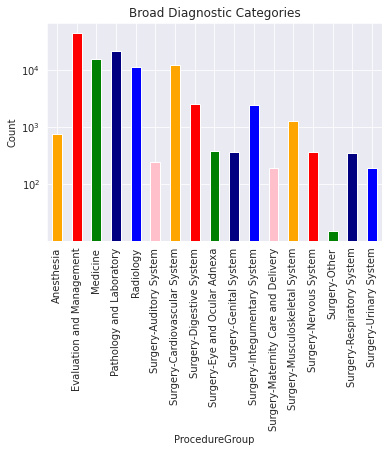

In [30]:
###
### YOUR CODE HERE
###

#Group the dataframe and then count the occurencs to get the count of each specific procedure group
pg_counts = df_claim.groupby("ProcedureGroup")["ProcedureGroup"].count()

#set colors for each bar
c = ["orange", "red", "green", "navy", "blue", "pink"]

#Form the Graph
pg_counts.plot(kind="bar", color=c)

#change the y scale from numbers to a logarithmic scale with base 10
plt.yscale("log")

#Labels
plt.xlabel("ProcedureGroup")
plt.ylabel("Count")
plt.title("Broad Diagnostic Categories")
plt.show()

### Q4.2 
Similar to Q4.1 create bar chart for count of each specialty.

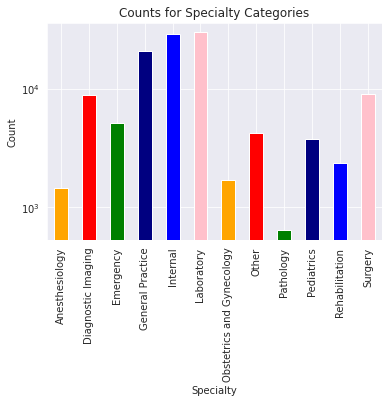

In [31]:
###
### YOUR CODE HERE
###

#Group the dataframe and then count the occurencs to get the count of each specific specialty group
specialty_counts = df_claim.groupby("Specialty")["Specialty"].count()

#set colors for each bar
c = ["orange", "red", "green", "navy", "blue", "pink"]

#Form the Graph
specialty_counts.plot(kind="bar", color=c)

#change the y scale from numbers to a logarithmic scale with base 10
plt.yscale("log")

#Labels
plt.xlabel("Specialty")
plt.ylabel("Count")
plt.title("Counts for Specialty Categories")
plt.show()

### Q4.3
Create density plot for PayDelay in df_claims. You may need to change some data values to integer depending on your data cleaning process. What can you conclude from the this plot?

Text(0, 0.5, 'Density')

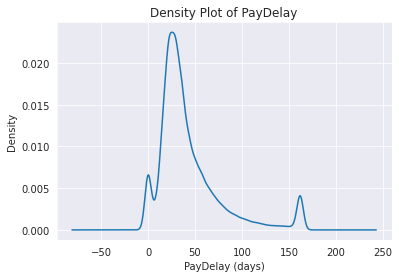

In [32]:
###
### YOUR CODE HERE
###


#convert the type
#df_claim["PayDelay"] = df_claim["PayDelay"].astype(int)
#when I do that, I get an error beacuse there is "num+", so i have to strip the "+"

#first make as string
df_claim['PayDelay'] = df_claim['PayDelay'].astype(str)

#once made as string we can now strip parts of the string, in this case, strip the "+"
df_claim['PayDelay'] = df_claim['PayDelay'].str.rstrip('+')

# convert column to integers now that the "+" is gone
df_claim['PayDelay'] = df_claim['PayDelay'].astype(int)

#check what the type is
#print(df_claim["PayDelay"].dtype)
#now the type is an integer


#NOW make the density plot
# create a density plot for the 'PayDelay' column
df_claim["PayDelay"].plot(kind="density")

# set the title and axis labels
plt.title("Density Plot of PayDelay")
plt.xlabel("PayDelay (days)")
plt.ylabel("Density")

## Justification in separate markdown or as a comment

#We can conclude that the vast majority of individuals will make their payments after about 30 days, with a sharp decline
#after the 30 day mark. This is very reasonsable to assume as most major credit card companies have payments do in 
#30 day time spans. Additionallyit takes about 20 days for health insurance companies to process claims, 
#which fits into this explanation. That after the 20 day period, the health insurance will come back with 
#their decision on how much insurance will cover and how much the individual will have to pay. After this 20-30 day mark,
#there is a sharp decline in PayDelay with a small spike at about 160 days. This 160 day mark may resemble an important
#date for the insurance company as it is around the 5-6 month mark after the claim/hospital visit.



### Q4.4

Create a dataframe selecting MemberID, LabCountTotal, LabVisits, DrugCountTotal, DrugVisits, AgeAtFirstClaim, Sex, DaysInHospitalY2, DaysInHospitalY3 from df_claims formed in Q3.6, removing duplicate rows.

Lets add a column the following columsns
- DaysInHospital = DaysInHospitalY2 + DaysInHospitalY3
- Bin the AgeAtFirstClaim into three categories - Teen (age < 20), Adult (20 <= age < 60), Old(60 <= age). Store this in column named Age.

Provide justifications for any handling of missing values (Ex. extra age label, imputing mode / mean, ignoring rows), how did you bin the data etc.

Create 2 scatter plots for LabCountTotal vs DaysInHospital and DrugCountTotal vs DaysInHospital using different labels for all 3 age labels. What can you conlude from these graphs?

In [33]:
cols = ['MemberID', 'LabCountTotal', 'LabVisits', 'DrugCountTotal', 'DrugVisits', 
        'AgeAtFirstClaim', 'Sex', 'DaysInHospitalY2', 'DaysInHospitalY3']

###
### YOUR CODE HERE
###

#creating the dataframe
new_df = df_claim[cols]

#remove duplicates
new_df = new_df.drop_duplicates()

#add days column
#this potentially may generate NaN and 0 values which stems from an error carried forward in Q3.6
new_df["DaysInHospital"] = new_df["DaysInHospitalY2"] + new_df["DaysInHospitalY3"]


#before we bin data we have to transform the 0-9 and 40-49 into actual integers
#we can do this by seperating these two dates into two different columns with AgeLower and AgeHigher for the lower and higher bounds
#after doing this we can create a new column called Age which will be the mean value between the lower and higher values
#by doing this, we are "fudging" the age beacause it may not be their exact age but this age does fall within their age range
#more importantly it allows us to then bin the data
new_df[["AgeLower", "AgeHigher"]] = new_df["AgeAtFirstClaim"].str.split('-', expand=True)

new_df = new_df.fillna(0)

#doing this because some of these ages contained ("+"), stripping it then changing it to an integer
#first make as string
new_df["AgeLower"] = new_df["AgeLower"].astype(str)

#once made as string we can now strip parts of the string, in this case, strip the "+"
new_df["AgeLower"] = new_df["AgeLower"].str.rstrip('+')

# convert column to integers now that the "+" is gone
new_df["AgeLower"] = new_df["AgeLower"].astype(int)

new_df["AgeHigher"] = new_df["AgeHigher"].astype(str)

#once made as string we can now strip parts of the string, in this case, strip the "+"
new_df["AgeHigher"] = new_df["AgeHigher"].str.rstrip('+')

# convert column to integers now that the "+" is gone
new_df["AgeHigher"] = new_df["AgeHigher"].astype(int)


#NOW .... 
#take the average between the agelower and agehigher and make that a new column 
new_df["Age MEAN"] = (new_df["AgeLower"]+new_df["AgeHigher"])/2


#bin data
#these are the age ranges for the ages
bins = [0,20,60,120]

#these are the labels for the given age ranges
labels = ["Teen", "Adult", "Old"]

#binning the data
new_df["Age"] = pd.cut(new_df["Age MEAN"], bins=bins, labels=labels)


#although not directed I'm clearing up the resulting dataframe and deleting a few columns to clear up the dataframe
#drop these extra columns using axis=1
new_df = new_df.drop(["AgeAtFirstClaim","DaysInHospitalY2","DaysInHospitalY3","AgeLower", "AgeHigher", "Age MEAN"],axis=1)


#final result
new_df

# Justification and conclusions in separate markdown or as a comment

,MemberID,LabCountTotal,LabVisits,DrugCountTotal,DrugVisits,Sex,DaysInHospital,Age
0,3713,9.0,2.0,17.0,4.0,F,0.0,Adult
10,4187,0.0,0.0,61.0,10.0,F,0.0,Adult
14,34791,3.0,1.0,19.0,9.0,F,0.0,Old
24,77647,12.0,4.0,15.0,8.0,F,0.0,Old
27,77647,10.0,1.0,5.0,2.0,F,0.0,Old
...,...,...,...,...,...,...,...,...
116363,99946229,0.0,0.0,6.0,5.0,F,0.0,Adult
116378,99946846,0.0,0.0,1.0,1.0,M,0.0,NaN
116393,99969451,3.0,2.0,2.0,2.0,F,0.0,Teen
116394,99969451,3.0,1.0,1.0,1.0,F,0.0,Teen


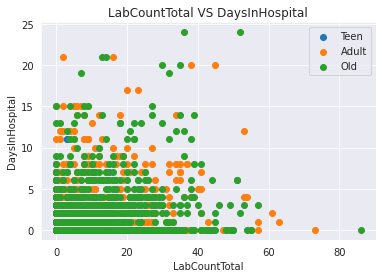

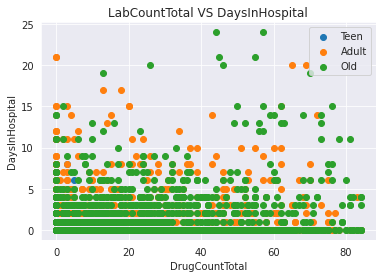

In [34]:
#Two Graphs and Explanation

#Create 2 scatter plots for LabCountTotal vs DaysInHospital  and DrugCountTotal vs DaysInHospital 
#using different labels for all 3 age labels. 

#FIRST seperate the ages into 3 different dataframes
# we do this so we can seperate the age data in the scatter plots
teen_df = new_df[new_df["Age"] == "Teen"]
adult_df = new_df[new_df["Age"] == "Adult"]
old_df = new_df[new_df["Age"] == "Old"]

#Create the first plot for the LABCOUNT
plt.scatter(teen_df["LabCountTotal"], teen_df["DaysInHospital"], label="Teen")
plt.scatter(adult_df["LabCountTotal"], adult_df["DaysInHospital"], label="Adult")
plt.scatter(old_df["LabCountTotal"], old_df["DaysInHospital"], label="Old")
plt.title("LabCountTotal VS DaysInHospital")
plt.xlabel("LabCountTotal")
plt.ylabel("DaysInHospital")
plt.legend()
plt.show()

#Create the second scatter plot for the DRUGCOUNT
plt.scatter(teen_df["DrugCountTotal"], teen_df["DaysInHospital"], label="Teen")
plt.scatter(adult_df["DrugCountTotal"], adult_df["DaysInHospital"], label="Adult")
plt.scatter(old_df["DrugCountTotal"], old_df["DaysInHospital"], label="Old")
plt.title("LabCountTotal VS DaysInHospital")
plt.xlabel("DrugCountTotal")
plt.ylabel("DaysInHospital")
plt.legend()
plt.show()


#What can you conlude from these graphs?
 #From these two graphs, it is reasonable to conclude that when focusing on the data for Adults, they have significantly
 #higher distribution of drugcounttotal opposed to lab count totals. This can be seen in the durg visualization with higher amounts of green and orange dots
 #shown in the right side of the visualization compared to the right side of the lab visualization.

 #In addition, it is reasonable to concldue that for Old people, there is a larger frequency of drug count totals with higher amounts of daysinhospitla compared to that of labcounttotals
 #This is spported by the cluster in the drugcount total visualization where there is a large cluster of points between 40-80 drug counts for days in hospital of 10-15 days.
 #When looking at these data points for the labcounttotal, there are NO points for the same range. This shows how for old people, they have higher freqiuencies of drugcounts with longer hospitalstays opposed to the same data for labcounts.

#Graph to look at just teens
#plt.scatter(teen_df["DrugCountTotal"], teen_df["DaysInHospital"], label="Teen")
#plt.scatter(teen_df["LabCountTotal"], teen_df["DaysInHospital"], label="Teen")

 #The data for the teen age is overshadowed by the high frequency of old counts for both lab and drgu counts, because of this it is hard to analyze the conclusions for teen data.
 #But by creating seperate teen graphs, it is evident that they have data similar to the rest of the age groups, but jsut in smaller porportions.
 #Across all age groups, there is a trend for a high frequency in having minimal hospital days (6 or less) but having 0-30 drug/lab counts




### Q4.5 (Open Ended)
Create visualization from any dataframes used in this lab that interests you. We recommend you build upon Q3.8 dataframe to create visualizations that provide deeper understanding and relationships between different variables. At least include 6 more visualizations here and one of the visualizations must be a new graph type that has not been introduced during lectures or labs

You must provide reasons for choosing each specific visualization and data and any conclusions that follow from that plots.

Random plots with arbitrary variables like MemberID vs ProviderID (ID's have no inherent numeric meaning) will not count.

In [117]:
###
### YOUR CODE HERE
###


#Each of the 6 visualizations
#ONE has to be differnt than those taught in class
#provide explanation for why you choose that specific viasualization and chosen data
#explain analysis & conclusions that result from plot

#Q3.8
#name of df = counts
#content in df = grouped with specialty then proceduregroup with counts of Y1,Y2,Y3 with Drug and Lab visit counts

#Q4.4
#name of df = new_df
#content in df = df containing binned age,gender,drug/lab visits and drug/lab counts 

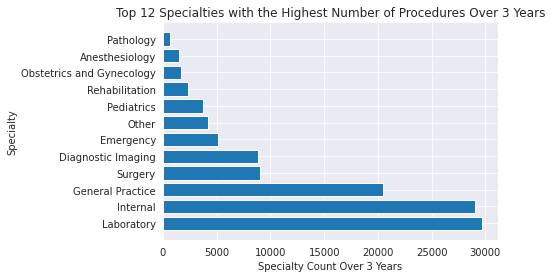

In [35]:
#Visualization 1

#Code

#to begin with, take the multi indexed Q3.8 DF and unstack it to only get the specialty as the index
#fill the new NaN values with 0 after unstacking
counts_unstacked = counts.unstack()
counts_unstacked.fillna(0,inplace=True)
counts_unstacked

#each specialty has its own row, count the sum of that individual row throughout the three years
#this gets the total sum of all the events that deal with that specific specialty
row_sums = counts_unstacked.sum(axis=1)

#sort the values from largest to smallest, only 12 specialties 
top_12 = row_sums.sort_values(ascending=False).head(12)
top_12

#create the graph
plt.barh(top_12.index,top_12.values)

#Graph details
plt.title("Top 12 Specialties with the Highest Number of Procedures Over 3 Years")
plt.xlabel("Specialty Count Over 3 Years")
plt.ylabel("Specialty")
plt.show()



#Reasoning & Explanation for specific visualization and chosen data
 #I choose to use a horizontal bar graph because I was able to better visualize the 12 specialties and their amounts, oppposed to being on the regular axis, and this bar chart was best to show and compare count amounts opposed to other visualizations
 #I choose to combine all 3 years together to show the total amounts over the 3 years and see what areas of specialtiies have the majority of procedures compared to others.
 #In other graphs I will break down each of the years to analyze the changes, but for the first graph I wanted to visualize the broader dataset of 3 years with their respected specialty

#Analysis & Conclusions
 #From the graph, it is evident that the majority of the hospital's specialty groups are focused around Laboratory, Internal, and General Practice procedures. 
 #It is also important to note that the pediatrics, rehab, OBGYN, anesthesiology, and pathology round out the bottom of the specialty counts over the 3 years with about 1000-4000 counts.
 #This graph would be useful for hospital management if they are looking to redirect staff or funding to the areaeas of General Practice, Internal, or Lab opposed to areas with less demand such as reahb and pathology.
    

In [36]:
top_12

TOP_6_OTHER = top_12.head(6)
TOP_6_OTHER["OTHER"] = top_12.tail(6).sum()
TOP_6_OTHER

Specialty
Laboratory            29669.0
Internal              28993.0
General Practice      20521.0
Surgery                9070.0
Diagnostic Imaging     8852.0
Emergency              5167.0
OTHER                 14144.0
dtype: float64

This pie chart displays the distribution of the top 6 specialty counts (and a category titled 'Other' that contains all the other specialties) over the three year period. These Top 6 Specialties account for 87.85% of the total procedure counts across all sepcialties.


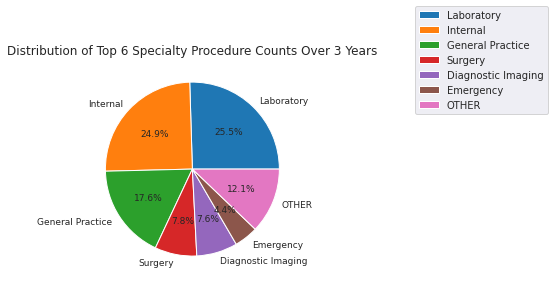

In [37]:
#Visualization 2

#Code

#utilize the code from above that gets the top 6 (which is the top 6 of the specialties) and the total sum of procedure counts that the specialty incurs over the 3 year period
top_6 = top_12.head(6)
a = (top_6.sum() / top_12.sum())*100
a = round(a,2)
print("This pie chart displays the distribution of the top 6 specialty counts (and a category titled 'Other' that contains all the other specialties) over the three year period. These Top 6 Specialties account for " + str(a) +"% of the total procedure counts across all sepcialties.")

#get the values and index to show in the pie graph
values = TOP_6_OTHER.values
labels = TOP_6_OTHER.index

#create graph
plt.pie(values,labels=labels, autopct= "%1.1f%%",textprops={'fontsize': 9})

#define graph
plt.title("Distribution of Top 6 Specialty Procedure Counts Over 3 Years")
plt.legend(labels, loc="center left", bbox_to_anchor=(1.5, 1))
plt.show()



#Reasoning & Explanation for specific visualization and chosen data
#I originally displayed the top_12 data in a pie chart with all 12 specialties. This resulted in an extremely messy, unreadiable, and unisightful pie chart.
#But i wanted to stick with the concept of utilizing a pie chart to show the proportional distribution of specialties, similar to visualization1.
#Because of these two reasons, I filtered the top 12 list to the top 6 specialites, which accounts for 87.85% of all procedure counts over the 3 year period and the OTHER category accoutns for the rest of the 12.1% of data.
#I wanted to display the same data from visualization 1 but in a different way, utilizing a pie chart is a great choice because it shows you t.he percentage of each specailty compared to the total opposed to just amounts in a bar chart

#Analysis & Conclusions
#Similar to Visualization 1, it is evident that the hospitals main three specialty counts are Labroatory, Internal and General Practice.
#But this visualization provides further insights in the terms of percentage in that the hospitals three leading specialties account for about 68% of all procedure counts. 
#More further, there is a large drop off after the leading three in which surgey and imaging account for about 8% of counts respectively. Rounding out the top 6 is Emergency which gets about 4.4% of procedure counts.
#This visualization, combines the lowest 6 counts of specialities and aggregates them into one column titled "OTHER" that accounts for other specialties that didn't have a large amount of counts.
#


Y1_counts    38174
Y2_counts    38587
Y3_counts    39655
dtype: int64


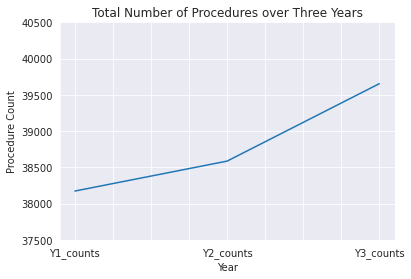

Although the graph displays a large increase, the percent change from Year 1 to Year 3 is: 3.88%


In [121]:
#Visualization 3

#Code

#sum each years drug & lab counts for specialty/procedure group that are organized by Y1,Y2,and Y3
total_counts = counts.sum()
print(total_counts)

#create graph
total_counts.plot(kind="line")

#graph details
plt.title("Total Number of Procedures over Three Years")
plt.xlabel("Year")
plt.ylabel("Procedure Count")
plt.ylim(37500,40500)
plt.show()

percent_change = (((39655-38174)/38174)*100)
percent_change = round(percent_change,2)

print("Although the graph displays a large increase, the percent change from Year 1 to Year 3 is: " +  str(percent_change) + "%")

#Reasoning & Explanation for specific visualization and chosen data
 #I choose to use a line graph to show the change in amounts over the 3 years for all specialty/proceduregroup reports.
 #I used the total_counts to sum the counts dataframe, which counts all specialties and procedure groups, and is grouped together by year
 #The most important aspect of the visualization is to show the change from Y3 to Y2 and from there to Y1.

#Analysis & Conclusions
 #From the visualization, it is evident of the steady increase from year1 to years 2 and 3. There is a gradual increase in the number of procedures over the course of the period.
 #It is important to note, that this graph does show a large increase from Year1 to Year3, but it is crucial for the reader to notice the Yaxis amounts in that Year 1 reports amounts of 38174 and Year 3 amnounts of 39655.
 #Although the graph shows a wide differnece between the years, i choose to print the sums as well as the percent change from year 3 to year 1 to show that there is only a 4% change in number of procedures from year 3 to year 1
 #Finally, it is reasonable to conclude that the hospital has witnessed steady, gradual growth over the 3 year period. With more data over previous years, more conclusions can be reached which could lead to decisions that could direct future funding and resources.

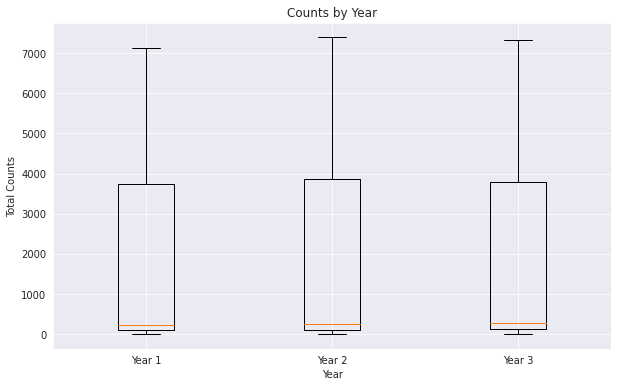

In [38]:
#Visualization 4

#Code

 #group the data by year and then sum it
counts_by_year = counts.groupby(level=1).sum()

 #create plot
 #DON'T SHOW OUTLIERS = chose not to show outliers because it allows the viewer to better understand and view the visualization!
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([counts_by_year['Y1_counts'], counts_by_year['Y2_counts'], counts_by_year['Y3_counts']], showfliers=False)

 #define graph
ax.set_xticklabels(["Year 1", "Year 2", "Year 3"])
ax.set_xlabel("Year")
ax.set_ylabel("Total Counts")
ax.set_title("Counts by Year")
plt.show()


#Reasoning & Explanation for specific visualization and chosen data
 #This graph is similar to the data from visualization 3, it analyzes the change in the total counts of procedures (regardless of specialty or procedure group) from all three years
 #The point of this graph is to show how different visualizations can lead to different conclusions. Visualization 3 shows how this an increasing trend in the number of counts over the 3 year period. But this visualization shows a different, yet true and valid story with the same data.



#Analysis & Conclusions
 #This visualization is intended to show that increase in Vis 3 is extremely minimal.
 #These box and whisker plots do an incredible job at showing how the min,1q,median,3q, and max are extremely consistent over the 3 year time span.
 #Overall, this visualizaiton utilizes the same data from visualization 3 but allows the reader to come to a different, yet still accurate conclusion about the trend of the hospital total counts over the 3 year period.

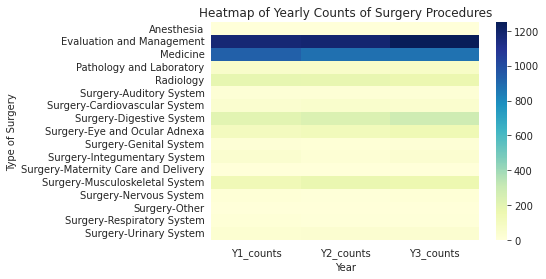

In [39]:
#Visualization 5 = NEW Visualization = Heat Map

#Code
 #Filter the counts dataframe to only get the counts dataframe with SURGERY as the specialty
counts_surgery = counts.xs("Surgery", level=0)

 #Create a heatmap with this counts_surgery
sns.heatmap(counts_surgery, cmap="YlGnBu")

 #Set the title and axis labels
plt.title("Heatmap of Yearly Counts of Surgery Procedures")
plt.xlabel("Year")
plt.ylabel("Type of Surgery")

 #Show the plot
plt.show()


#Reasoning & Explanation for specific visualization and chosen data
 #From a hospital management perspective, it would be extremely interesting to analyze which procedure group of sugeries is the most prevalent over the three year time span. 
 #Utilizing a heat map is a great way to show what type of surgery is common compared to other times.

#Analysis & Conclusions
 #Unfortunately, this visualization does not have extensive insights to it except the obvious indication that the vast majority of surgeries coomes from "Evaluation and Management" and "Medicine"
 #The visualization below will go into more depth about the frequnecies of yearly counts of surgery procedures.

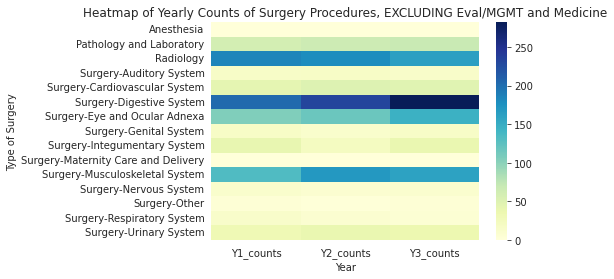

In [40]:
#Visualization 6 = NEW Visualization = Heat Map --> Filtered from Vis 5

#Code

 #Filter the above counts_surgery dataframe and drop the rows of Eval/Managemt and Medcine because there presence in the above heatmap overshadows the rest of the surgery types
Filtered = counts_surgery.drop(["Evaluation and Management", "Medicine"])

 #Create heatmap
sns.heatmap(Filtered, cmap="YlGnBu")

 #Set the title and axis labels
plt.title("Heatmap of Yearly Counts of Surgery Procedures, EXCLUDING Eval/MGMT and Medicine")
plt.xlabel("Year")
plt.ylabel("Type of Surgery")

 #Show the plot
plt.show()


#Reasoning & Explanation for specific visualization and chosen data
 #From a hospital management perspective, it would be extremely interesting to analyze which procedure group of sugeries is the most prevalent over the three year time span. 
 #Utilizing a heat map is a great way to show what type of surgery is common compared to other times.
 #Because of the overshadowing data from eval/MGMT and medicine, I created another heatmap, that contains the same data but deletes the Eval&Man and Medicine columns which allows us to further analyze the other surgery types.
 #I am doing this because the evaluation and management and medicine data is overshadowing the other surgery types. For this reason I am creating another heatmap to accurately display the distribution of other types of surgerys.

#Analysis
 #From this filtered heatmap, it is much more evident that other frequent surgery types come from the digestive system, eyes, radiology, and musculoskeletal surgeries.
 #Apart from these four areas, there are no other types of surgeries that "heat/light up" the visualization to show its frequnecy over the three year period.
 #As stated above, it would be a very insightful thing for hosppital managgement to notice and track this data over the time span and notice any trends in surgery types.
      
    

In [41]:
df_claim.isnull().sum()

MemberID                 0
ProviderID               0
Vendor                   0
PCP                      0
Year                     0
Specialty                0
PlaceSvc                 0
PayDelay                 0
DSFS                     0
PrimaryConditionGroup    0
CharlsonIndex            0
ProcedureGroup           0
SupLOS                   0
LabCountTotal            0
LabVisits                0
DrugCountTotal           0
DrugVisits               0
AgeAtFirstClaim          0
Sex                      0
DaysInHospitalY2         0
DaysInHospitalY3         0
dtype: int64